In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv(r'C:\Games\Ekonometrika\contest_test.csv')
df.head(10)

data = ['FEATURE_251','FEATURE_252','FEATURE_253','FEATURE_254','FEATURE_255']
data_2 = ['FEATURE_231','FEATURE_232','FEATURE_233','FEATURE_234','FEATURE_235']
data = data + data_2

df = df.loc[:, data]
len_pr = len(data)

df.head()
print(len)

<built-in function len>


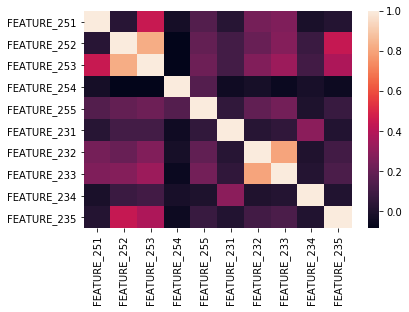

In [46]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [40]:
index = df.index
columns = df.columns 

scaled = (df - df.mean(axis=0))/df.std() 
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

kmeans = KMeans(n_clusters=3, random_state=17) 
kmeans.fit(scaled_data); 
scaled_data['kmeans'] = kmeans.labels_
cluster_dict={}

for i in range(3):
    clust_list = scaled_data[scaled_data['kmeans']==i][data].index.values 
    print('Состав кластера {}: {}' 
          .format(i, clust_list))
    
N_CLUSTERS = {
    "complete" : 3,
    "ward"     : 3,
    "kmeans"  : 3,
}

kmeans = KMeans(n_clusters=N_CLUSTERS['kmeans'], random_state=17)
kmeans.fit(scaled_data)
scaled_data['kmeans'] = kmeans.labels_
print('\n')
print(scaled_data)

Состав кластера 0: [   3    5    6 ... 9478 9479 9482]
Состав кластера 1: [   1    4    7 ... 9468 9475 9483]
Состав кластера 2: [   0    2    8 ... 9471 9480 9481]


      FEATURE_251  FEATURE_252  FEATURE_253  FEATURE_254  FEATURE_255  kmeans
0       -0.371956    -0.492334    -0.763943     0.673544    -1.822191       0
1        0.462974     1.015913     0.654801     0.673544     0.548732       2
2        1.903037    -1.165744    -0.388964    -1.484527    -1.822191       0
3       -0.356636     0.046345    -0.217286     0.673544     0.548732       1
4        0.669791     0.854783     0.883366     0.673544     0.548732       2
5       -0.371956    -1.239759    -1.122328     0.673544     0.548732       1
6       -0.325997    -0.192481    -0.536932    -1.484527     0.548732       1
7        1.221305     0.547484     0.745828     0.673544     0.548732       2
8       -0.371956    -0.788339    -0.786583     0.673544    -1.822191       0
9        0.493614    -0.570174    -0.366231    -1.484

In [29]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Games\Ekonometrika\contest_test.csv')
df.head(10)

data = ['FEATURE_33','FEATURE_34','FEATURE_35','FEATURE_36','FEATURE_37']
data_2 = ['FEATURE_33','FEATURE_34','FEATURE_35','FEATURE_36','FEATURE_37','TARGET']

train_data = pd.read_csv(r'C:\Games\Ekonometrika\contest_train.csv').loc[:, data_2]
train_data.head(10)

lda = LinearDiscriminantAnalysis().fit(train_data[data], train_data.TARGET)

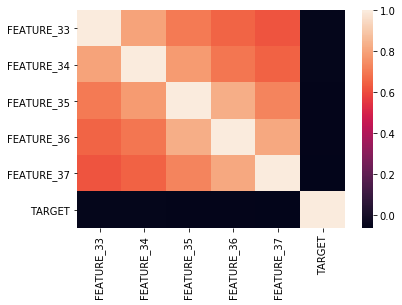

In [30]:
import seaborn as sns
corr = train_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

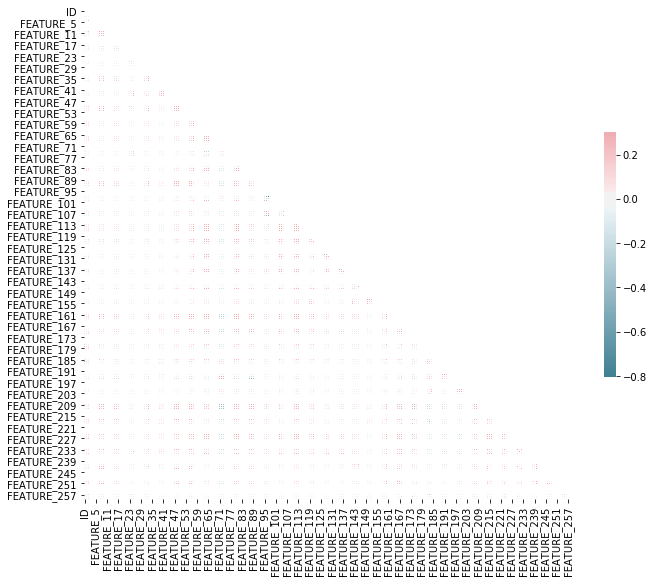

In [31]:
#corr = df.corr()
#sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
def get_df_coef(lda, features, ):
    return pd.DataFrame(
        np.vstack([lda.intercept_, lda.coef_.T]),
        index=["Intercept"] + features,
        columns=lda.classes_
    )

df_coef = get_df_coef(lda, data)
df_coef

,0,1,2
Intercept,-3.552607e-01,-1.454206,-2.761740
FEATURE_33,3.787199e-06,-0.000005,-0.000026
FEATURE_34,7.727709e-07,-0.000003,0.000003
FEATURE_35,2.057787e-06,-0.000004,-0.000011
FEATURE_36,-6.963188e-07,0.000005,-0.000010
FEATURE_37,6.674335e-06,-0.000013,-0.000029


In [33]:
#train_data.head(10)
lda.priors_ 

array([0.70845398, 0.23041475, 0.06113128])

In [34]:
def LDA_predict(lda, X):
    return pd.DataFrame(
        lda.predict(X),
        columns=["TARGET"],
        index=X.index
    )

lda_predict_train = LDA_predict(lda, train_data[data])
(lda_predict_train.TARGET == train_data.TARGET).value_counts(normalize=True)
lda_predict_train.head(10)


,TARGET
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [35]:
lda_predict = LDA_predict(lda, df[data])
lda_predict.head(1000)
#df.head(10)

,TARGET
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [47]:
#df.head(100)
#df1 = df.iloc[:,30:100]
#df1.head(100)

data_to_excel = df[data]
data_to_excel["Results lda"] = lda_predict
data_to_excel.to_csv("C:\Games\Ekonometrika\contest_answer.csv")

In [37]:
#train_data[data]

In [53]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
print(syn0,syn1)
print('\n')

for j in range(60000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)
print(l1)

[[ 0.96172508 -0.55210156  0.21535428 -0.91001559]
 [-0.39871671 -0.41976542  0.31255599 -0.47023929]
 [ 0.91673858  0.46086741 -0.1607575  -0.53073862]] [[-0.57195621]
 [-0.58996406]
 [-0.31583609]
 [-0.85460899]]


[[9.23251874e-01 9.99467641e-01 4.66715462e-01 9.51508106e-01]
 [4.17960170e-01 7.88430477e-01 1.74079170e-01 4.15331876e-02]
 [9.98664020e-01 9.65181786e-01 5.12325708e-01 1.25398128e-02]
 [9.78080760e-01 5.21538435e-02 2.01919468e-01 2.80436225e-05]]
